### 1. Importing Libraries

In [102]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
# Regular EDA and plotting libraries
%matplotlib inline
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Thu Oct 24 15:58:17 2024


### 2. Loading dataset

In [51]:
df=pd.read_csv("heart dataset.csv")

In [52]:
# Let's check the top 5 rows of our dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:

df.shape # (rows, columns)

(303, 14)

`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

# 1. Data Cleaning

### Null Values

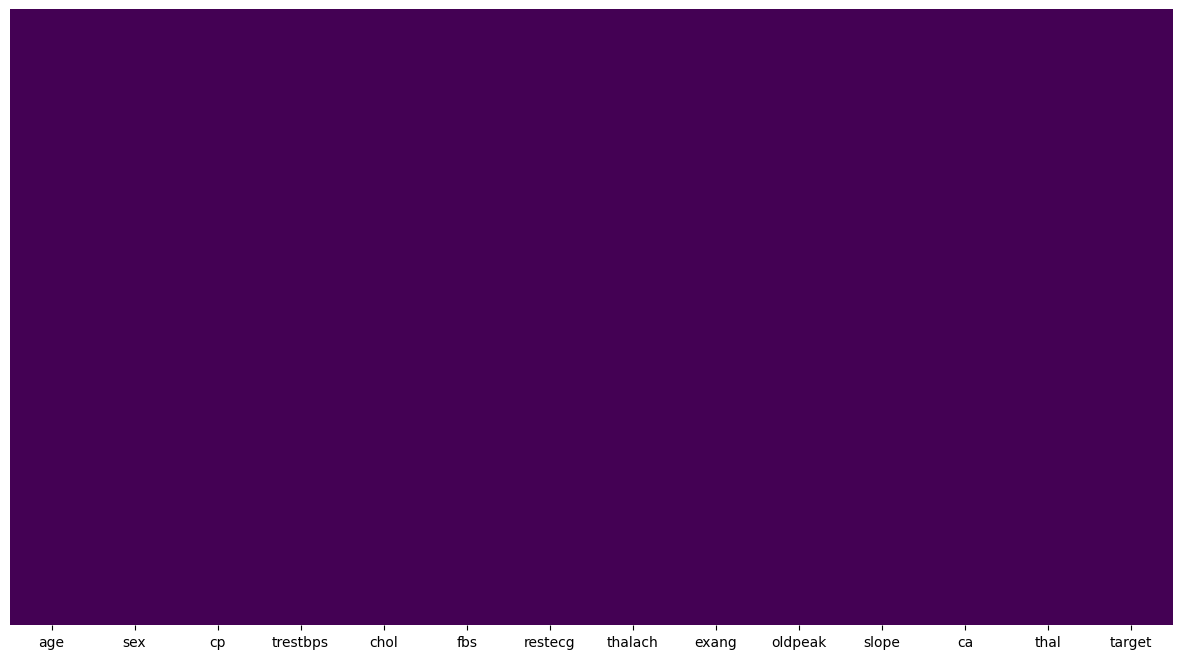

In [54]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

### Checking outliers

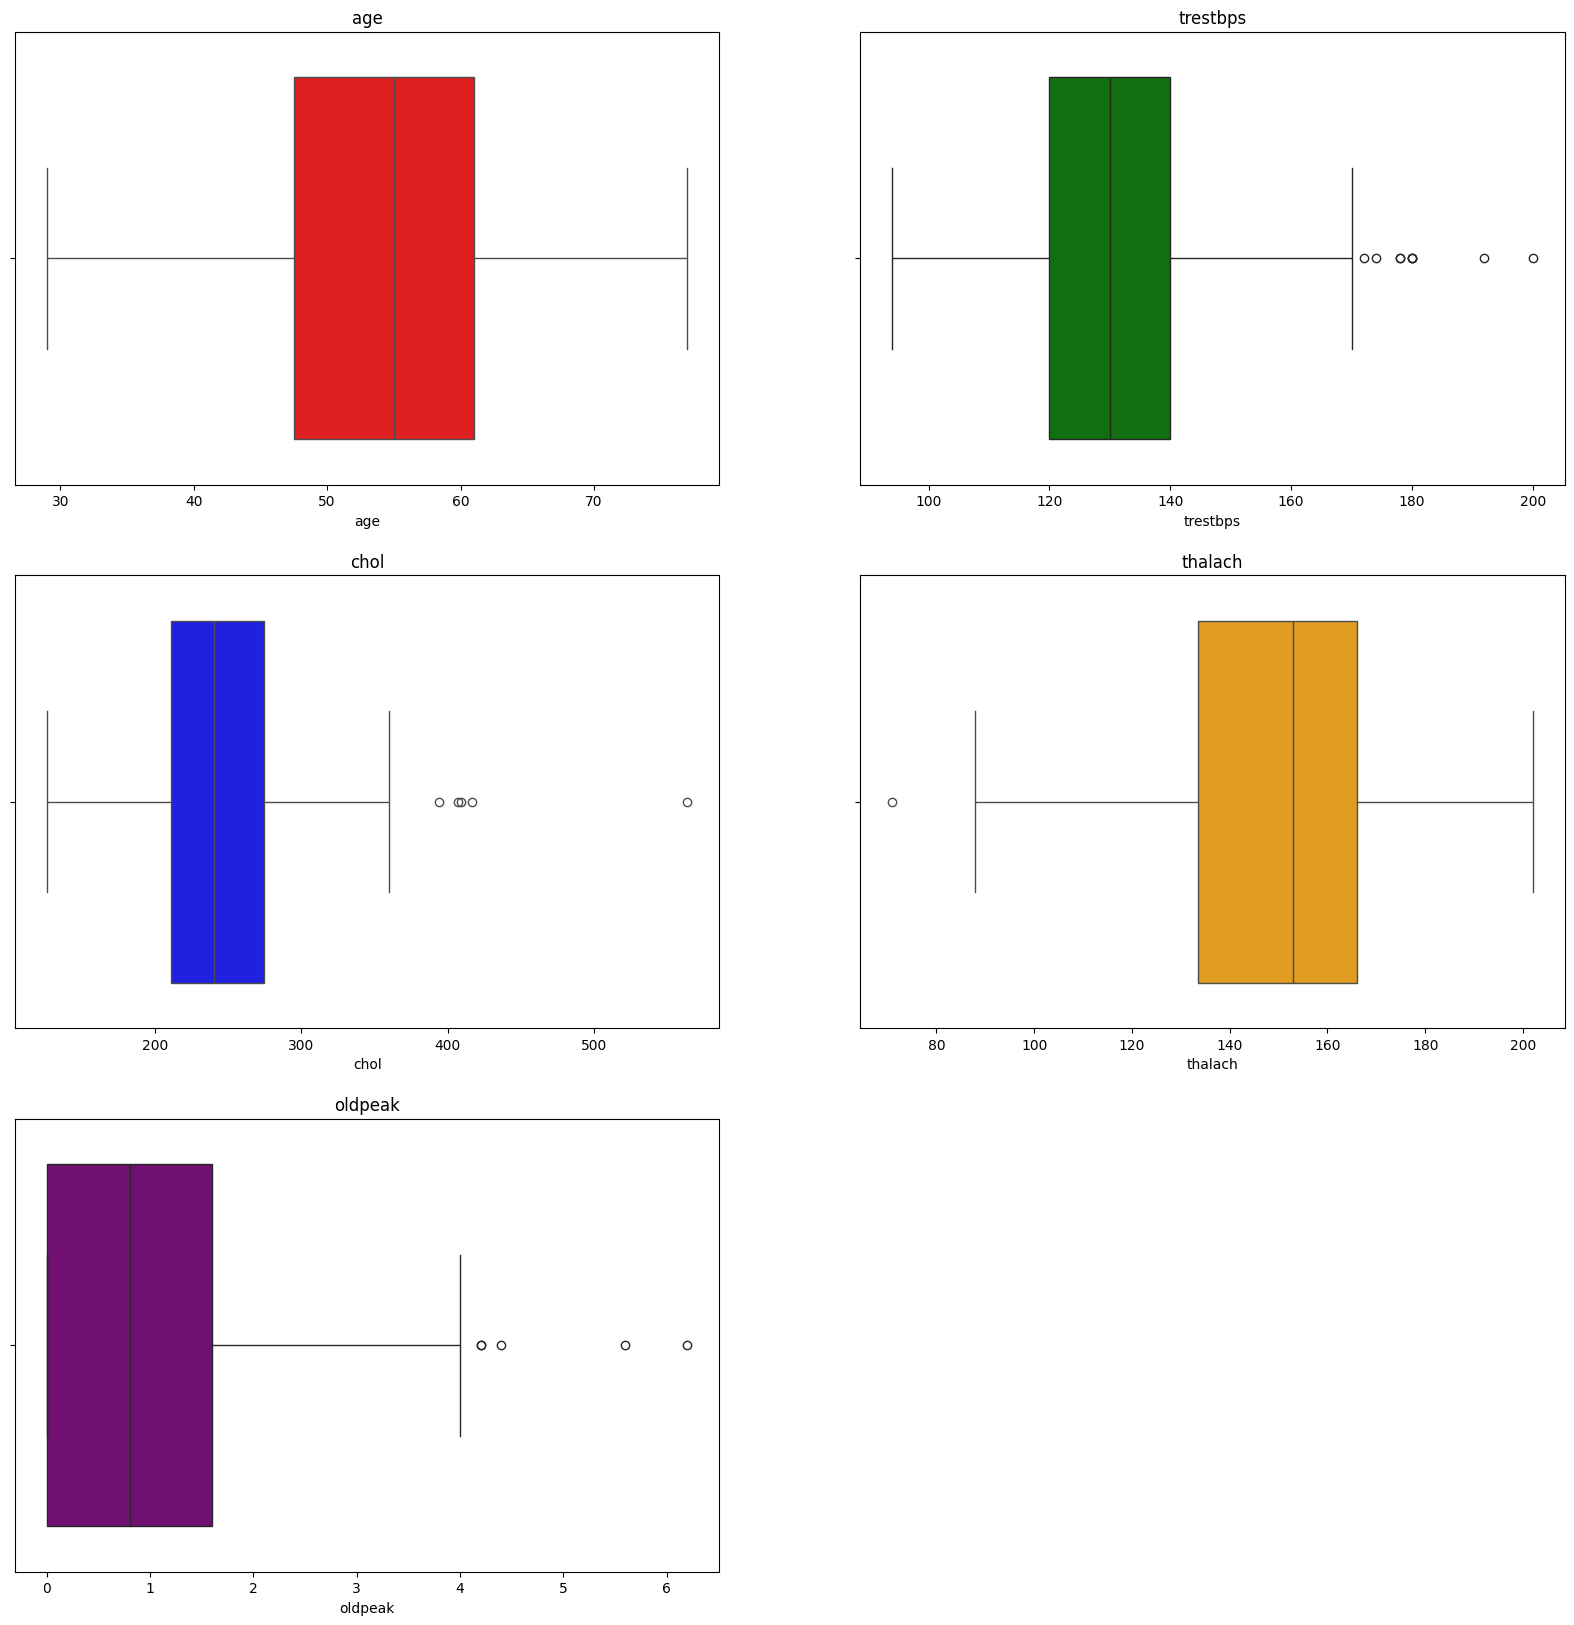

In [55]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))
numeric_cols=["age","trestbps","chol","thalach","oldpeak"]
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show() 

### removing outliers

<Axes: ylabel='chol'>

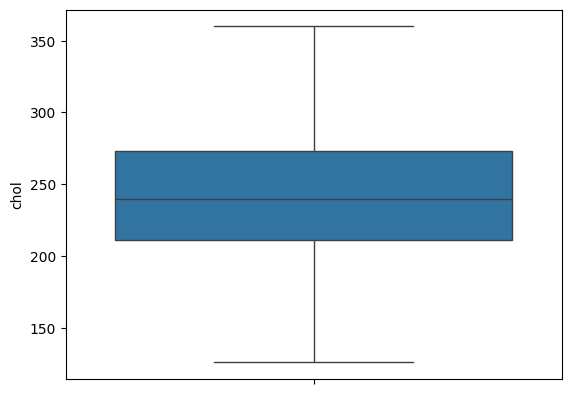

In [56]:
# Define the column where you want to remove outliers
column = 'chol'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
chol_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
sns.boxplot(data=chol_no_outliers["chol"])

<Axes: ylabel='trestbps'>

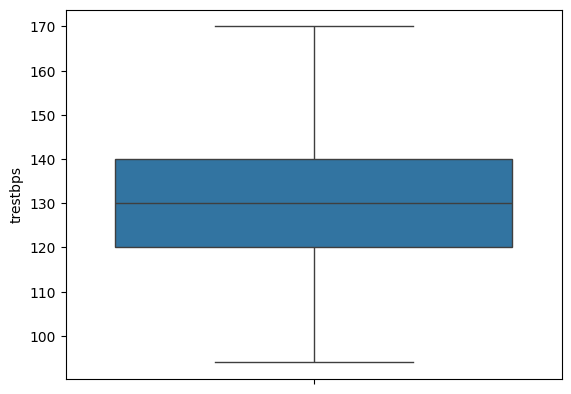

In [57]:
# Define the column where you want to remove outliers
column = 'trestbps'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
trestbps_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
sns.boxplot(data=trestbps_no_outliers["trestbps"])

<Axes: ylabel='oldpeak'>

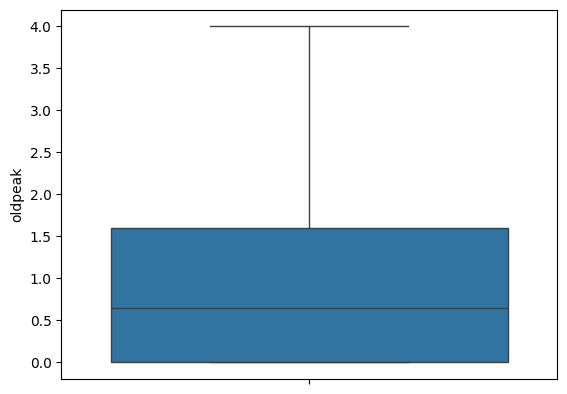

In [58]:
# removing outliers
# Define the column where you want to remove outliers
column = 'oldpeak'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
oldpeak_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
sns.boxplot(data=oldpeak_no_outliers["oldpeak"])

In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


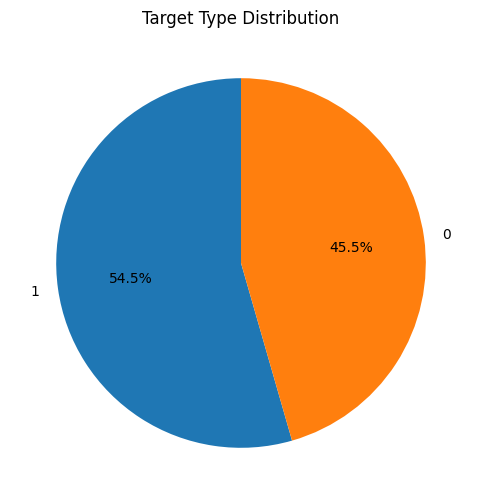

In [60]:
# Count the values for 'cp' (Chest Pain Type)
target_counts = df['target'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Type Distribution')
plt.show()


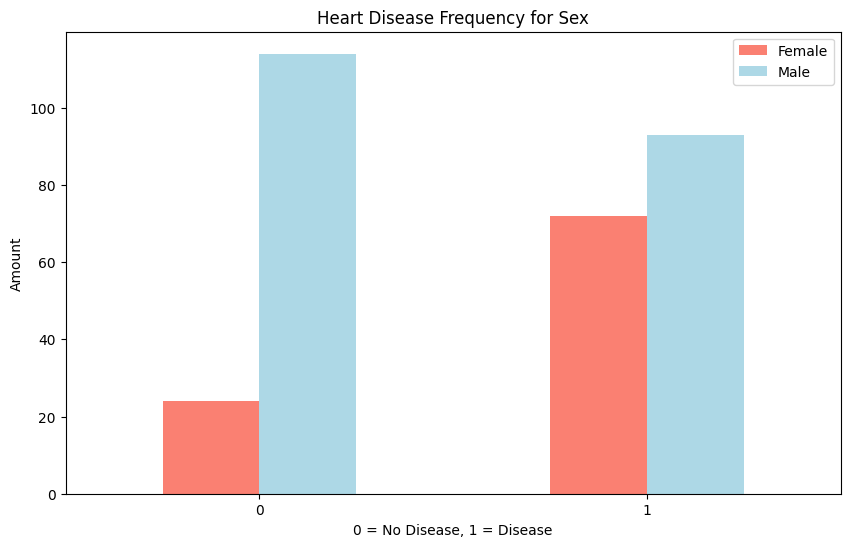

In [91]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Text(0.5, 1.0, 'Age distribution')

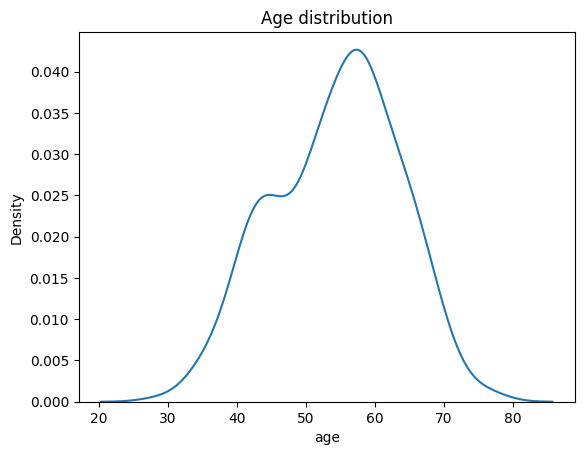

In [62]:
sns.kdeplot(df['age'])
plt.title("Age distribution")

In [63]:
age_bins = [29,46,61,77]
age_labels = ['29-45', '46-60','61-77']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [64]:
df['age_category'].value_counts()

age_category
46-60    160
61-77     78
29-45     64
Name: count, dtype: int64

<Axes: xlabel='age_category', ylabel='count'>

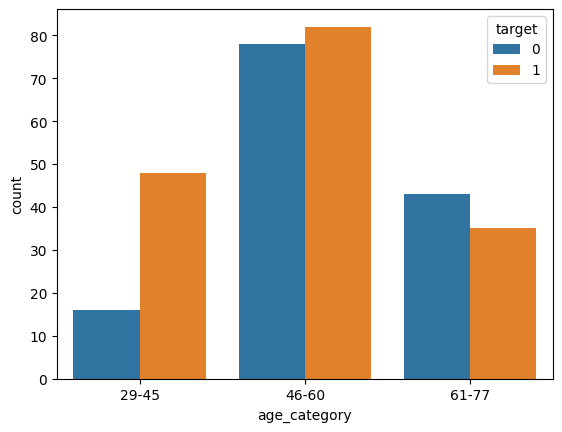

In [65]:
sns.countplot(data=df, x='age_category', hue='target')

Text(0.5, 1.0, 'diseased by sex')

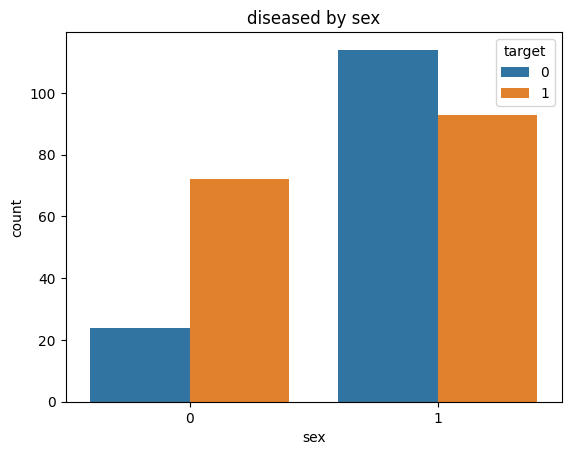

In [66]:
# Group by cancer_stage and count the number of survivors and non-survivors
sns.countplot(data=df,x="sex",hue="target")
plt.title("diseased by sex")


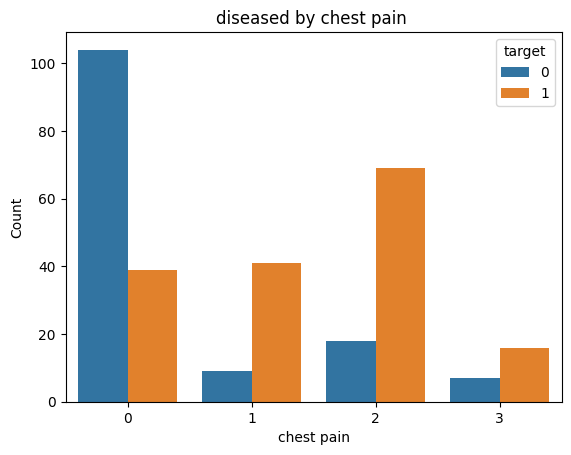

In [67]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('diseased by chest pain ')
plt.xlabel('chest pain')
plt.ylabel('Count')
plt.show()

In [68]:
trestbps_bins = [94,140,200]
age_labels = ['94-140', '141-200']
df['trestbps_category'] = pd.cut(df['trestbps'], bins=trestbps_bins, labels=age_labels, right=False)

In [69]:
df['trestbps_category'].value_counts()

trestbps_category
94-140     206
141-200     96
Name: count, dtype: int64

<Axes: xlabel='trestbps_category', ylabel='count'>

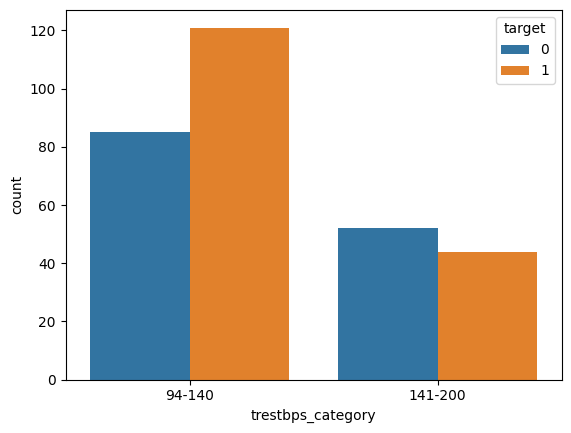

In [70]:
sns.countplot(data=df, x='trestbps_category', hue='target')

In [71]:
chol_bins = [126,200,564]
age_labels = ['126-200', '201-564']
df['chol_category'] = pd.cut(df['chol'], bins=chol_bins, labels=age_labels, right=False)

In [72]:
df['chol_category'].value_counts()

chol_category
201-564    252
126-200     50
Name: count, dtype: int64

<Axes: xlabel='chol_category', ylabel='count'>

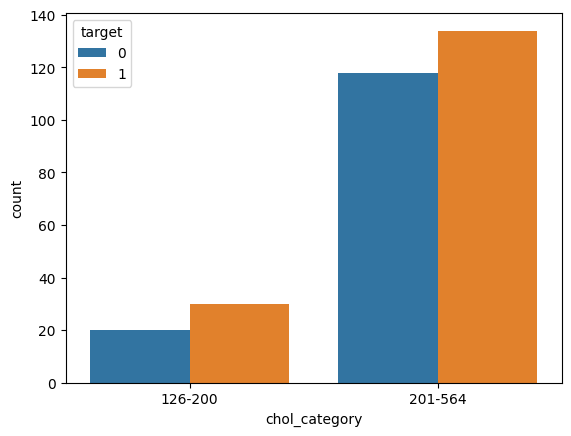

In [73]:
sns.countplot(data=df, x='chol_category', hue='target')

In [74]:
df['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

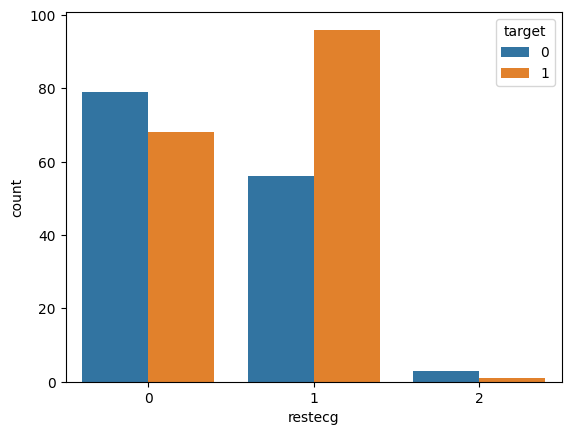

In [75]:
sns.countplot(data=df, x='restecg', hue='target')

<Axes: xlabel='thalach', ylabel='count'>

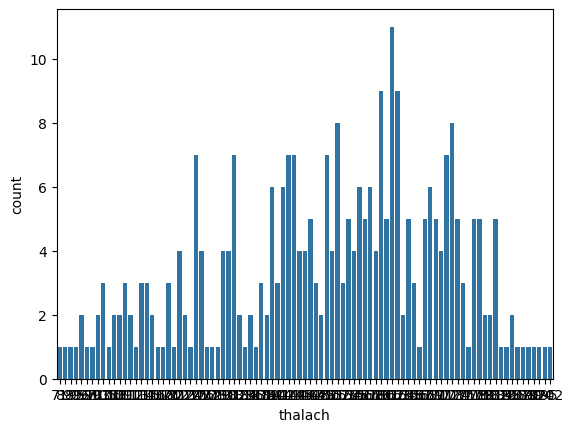

In [76]:
sns.countplot(data=df, x='thalach')

In [77]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

<Axes: xlabel='exang', ylabel='count'>

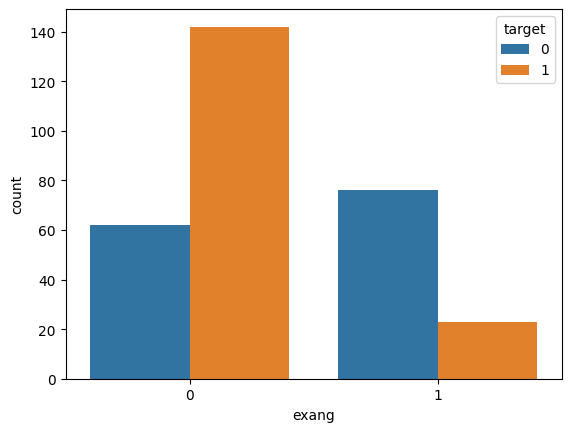

In [78]:
sns.countplot(data=df, x='exang', hue='target')

<Axes: xlabel='oldpeak', ylabel='Count'>

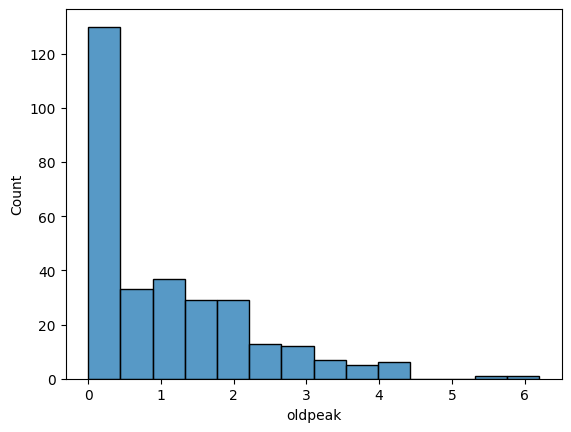

In [80]:
sns.histplot(df['oldpeak'])

In [79]:
oldpeak_bins = [0.0,2.1,4.1,6.2]
oldpeak_labels = ['0.0-2.0', '2.1-4.0','4.1-6.2']
df['oldpeak_category'] = pd.cut(df['oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels, right=False)

<Axes: xlabel='oldpeak_category', ylabel='count'>

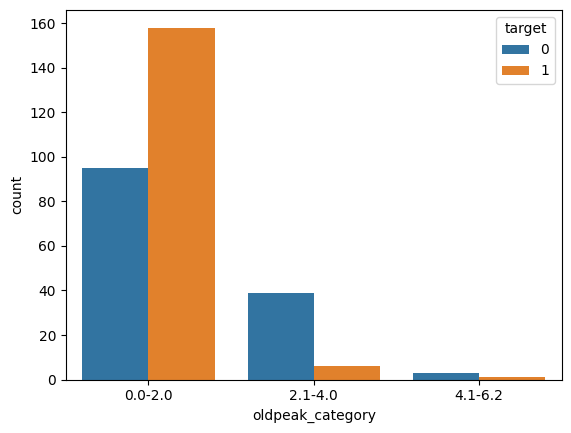

In [34]:
sns.countplot(data=df, x='oldpeak_category', hue='target')

In [81]:
df['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slope', ylabel='count'>

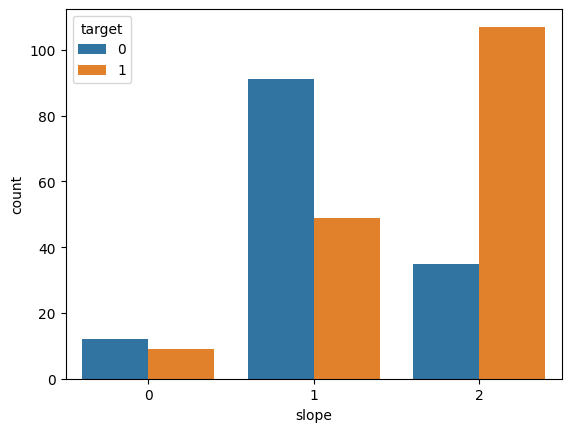

In [82]:
sns.countplot(data=df, x='slope', hue='target')

In [83]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

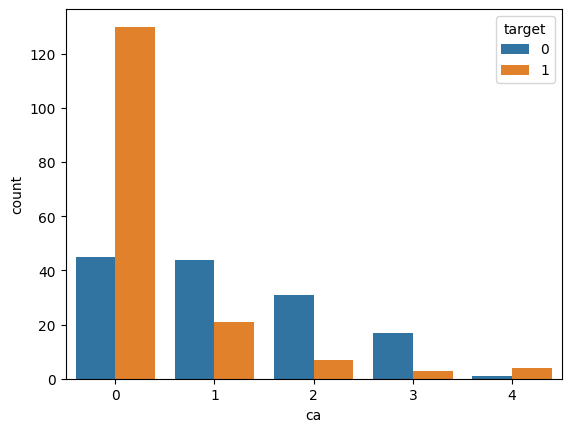

In [84]:
sns.countplot(data=df, x='ca', hue='target')

In [85]:
df['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

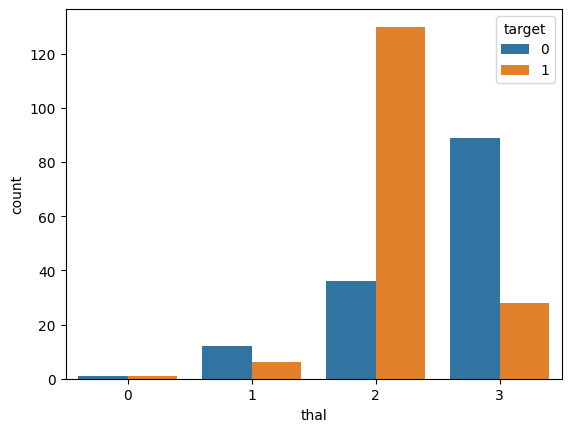

In [86]:
sns.countplot(data=df, x='thal', hue='target')

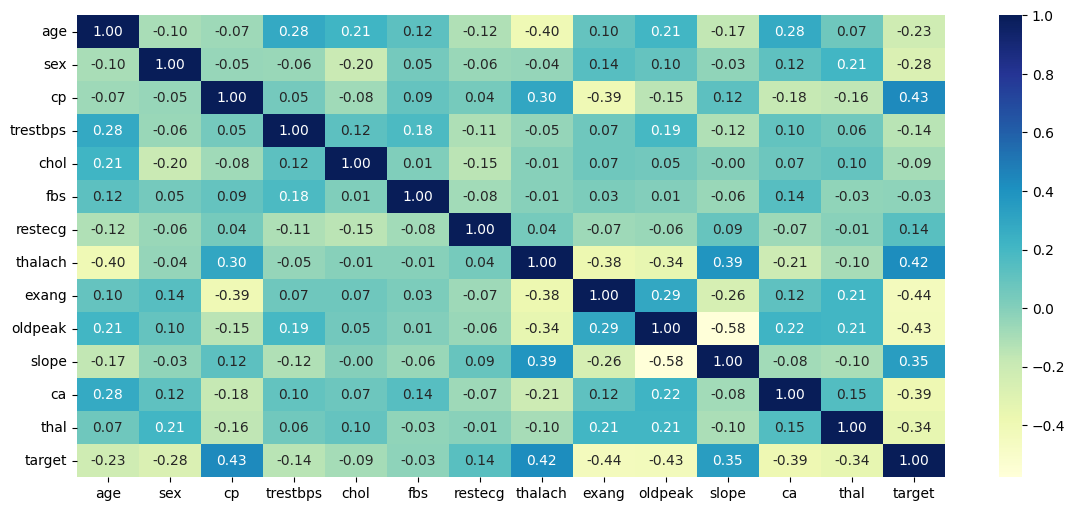

In [92]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(14,6))
sns.heatmap(numeric_df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")   
plt.show()

### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

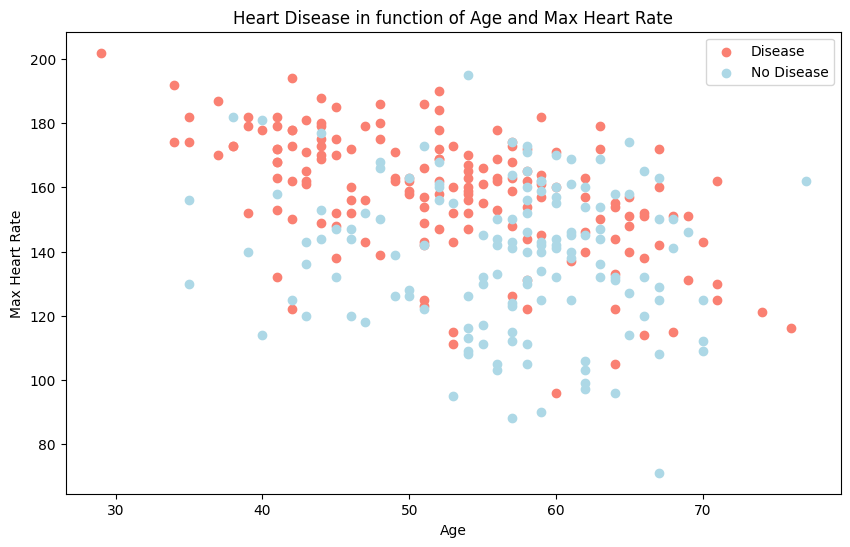

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

## 5. Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [ ]:
df.drop(["age_category","trestbps_category","chol_category","oldpeak_category"],axis=1,inplace=True)

In [116]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [117]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [118]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Let's see our new variables.

In [119]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [98]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 70% of your data to train on and the other 30% to test on.

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).


Let's look at our training data.

In [121]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [122]:
y_train, len(y_train)

(array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64),
 212)

Beautiful, we can see we're using 242 samples to train on. Let's look at our test data.

In [123]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [124]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1], dtype=int64),
 91)

And we've got 61 examples we'll test our model(s) on. Let's build some.

## loading and training

In [125]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Naive Bays " : GaussianNB(),
          "Decision tree ":DecisionTreeClassifier(),
          "Random forest classifier":RandomForestClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [126]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

e:\Najma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8131868131868132,
 'Naive Bays ': 0.8351648351648352,
 'Decision tree ': 0.7362637362637363,
 'Random forest classifier': 0.8241758241758241,
 'GradientBoostingClassifier': 0.7802197802197802}

{'Logistic Regression': 0.8852459016393442}

Beautiful! Since our models are fitting, let's compare them visually.

## Model Accuray

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

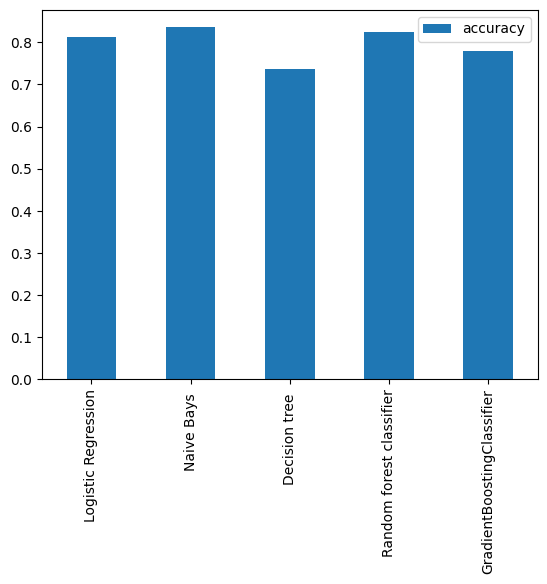

In [127]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();